In [ ]:
# load the dataset 
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from datetime import datetime, timedelta
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

data = pd.read_excel('/content/drive/MyDrive/Pump Predictive Maintenance/Condition Hydraulic Pump/condition Hydraulic.xlsx')
data.head()

,Unnamed: 0,cycle_id,date,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable,rul,label1
0,0,1,2019-01-01 00:00:00,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130,1,35.166667,0
1,1,2,2019-01-01 00:10:00,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130,1,35.000000,0
2,2,3,2019-01-01 00:20:00,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,NaN,1.113217,59.543150,3,100,0,130,1,34.833333,0
3,3,4,2019-01-01 00:30:00,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130,1,34.666667,0
4,4,5,2019-01-01 00:40:00,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130,1,34.500000,0


In [ ]:
df = pd.DataFrame(data, columns=['PS1','PS3', 'PS4', 'PS5', 'FS1', 'FS2', 'TS1', 'P1', 'VS1', 'CE1', 'CP1', 'SE1', 'accumulator'])

In [ ]:
df = df.fillna(method='ffill')
df.head()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1,accumulator
0,160.673492,1.991475,0.0,9.842170,6.709815,10.304592,35.621983,2538.929167,0.576950,39.601350,1.862750,59.157183,130
1,160.603320,1.976234,0.0,9.635142,6.715315,10.403098,36.676967,2531.498900,0.565850,25.786433,1.255550,59.335617,130
2,160.347720,1.972224,0.0,9.530548,6.718522,10.366250,37.880800,2519.928000,0.576533,25.786433,1.113217,59.543150,130
3,160.188088,1.946575,0.0,9.438827,6.720565,10.302678,38.879050,2511.541633,0.569267,20.459817,1.062150,59.794900,130
4,160.000472,1.922707,0.0,9.358762,6.690308,10.237750,39.803917,2503.449500,0.577367,19.787017,1.070467,59.455267,130


In [ ]:
df['accumulator'].unique()

array([130, 115, 100,  90])

In [ ]:
X = df.iloc[:, :12]
y = df.iloc[:, 12]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
#test_y = le.fit_transform(test_y)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, num_classes = 4)
y_test = keras.utils.to_categorical(y_test, num_classes = 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Part 2 - Now let's make the ANN!
# import necessary modules  
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from sklearn.metrics import classification_report, confusion_matrix
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=12))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='softmax'))
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 600, batch_size = 16)

Epoch 1/600
111/111 [==============================] - 3s 2ms/step - loss: 1.5279 - accuracy: 0.2064
Epoch 2/600
111/111 [==============================] - 0s 2ms/step - loss: 1.3221 - accuracy: 0.3474
Epoch 3/600
111/111 [==============================] - 0s 2ms/step - loss: 1.2794 - accuracy: 0.4015
Epoch 4/600
111/111 [==============================] - 0s 2ms/step - loss: 1.2553 - accuracy: 0.4117
Epoch 5/600
111/111 [==============================] - 0s 2ms/step - loss: 1.2315 - accuracy: 0.4498
Epoch 6/600
111/111 [==============================] - 0s 2ms/step - loss: 1.2389 - accuracy: 0.4658
Epoch 7/600
111/111 [==============================] - 0s 2ms/step - loss: 1.1993 - accuracy: 0.5109
Epoch 8/600
111/111 [==============================] - 0s 2ms/step - loss: 1.2006 - accuracy: 0.5043
Epoch 9/600
111/111 [==============================] - 0s 2ms/step - loss: 1.2068 - accuracy: 0.4977
Epoch 10/600
111/111 [==============================] - 0s 2ms/step - loss: 1.2005 - accura

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)

Test score: 1.1220768690109253
Test accuracy: 0.48752835392951965


In [ ]:
np.argmax(y_pred, axis=1)

array([3, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 2,
       3, 0, 3, 1, 0, 0, 1, 3, 1, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3,
       2, 1, 0, 3, 0, 3, 3, 0, 3, 0, 0, 2, 3, 0, 3, 0, 0, 3, 3, 2, 0, 3,
       0, 1, 0, 0, 0, 0, 2, 0, 3, 0, 0, 3, 0, 2, 3, 3, 1, 1, 0, 0, 0, 0,
       3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 2, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 1, 0, 3, 3, 0, 3, 0,
       0, 1, 0, 3, 1, 0, 1, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 2, 3,
       3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 0, 0, 3, 0, 2, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 1, 0, 1, 0, 3, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 3, 3, 0,
       3, 0, 3, 3, 0, 3, 1, 0, 0, 1, 0, 0, 3, 2, 2, 0, 3, 3, 0, 0, 0, 1,
       0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 1, 3, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 1, 0, 0, 0,

In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.48      0.76      0.59       152
           1       0.43      0.17      0.25        75
           2       0.44      0.08      0.13        91
           3       0.52      0.64      0.57       123

    accuracy                           0.49       441
   macro avg       0.47      0.41      0.39       441
weighted avg       0.47      0.49      0.43       441

[[116   9   3  24]
 [ 36  13   4  22]
 [ 49   8   7  27]
 [ 42   0   2  79]]


In [ ]:
model.save('accumulator.h5')

Feature: 0, Score: 0.00814
Feature: 1, Score: 0.00524
Feature: 2, Score: 0.01561
Feature: 3, Score: 0.00889
Feature: 4, Score: 0.00734
Feature: 5, Score: 0.01755
Feature: 6, Score: 0.00884
Feature: 7, Score: 0.01056
Feature: 8, Score: 0.01663
Feature: 9, Score: 0.01296
Feature: 10, Score: 0.02421
Feature: 11, Score: 0.00742


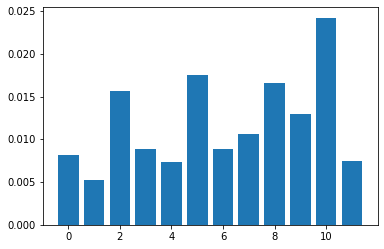

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# perform permutation importance
results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
pip install eli5

     |████████████████████████████████| 112kB 8.5MB/s 


In [ ]:
#Install non-standard packages (assuming jupyter notebook)
!pip install shap
!pip install lime
!pip install eli5

     |████████████████████████████████| 358kB 8.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491623 sha256=54d1e8a731d0eab341cede416448e4d09fe43bb7440d3788facca827e5a6a0e0
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
     |████████████████████████████████| 276kB 8.1MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=bec4aa7ec81cfda00f04bf5d5658453e2441efcede6b8cc7c765d2d49624c2da
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
X.head()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1
0,160.673492,1.991475,0.0,9.842170,6.709815,10.304592,35.621983,2538.929167,0.576950,39.601350,1.862750,59.157183
1,160.603320,1.976234,0.0,9.635142,6.715315,10.403098,36.676967,2531.498900,0.565850,25.786433,1.255550,59.335617
2,160.347720,1.972224,0.0,9.530548,6.718522,10.366250,37.880800,2519.928000,0.576533,25.786433,1.113217,59.543150
3,160.188088,1.946575,0.0,9.438827,6.720565,10.302678,38.879050,2511.541633,0.569267,20.459817,1.062150,59.794900
4,160.000472,1.922707,0.0,9.358762,6.690308,10.237750,39.803917,2503.449500,0.577367,19.787017,1.070467,59.455267


In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier    
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,mean_absolute_error
clf_gini = DecisionTreeClassifier(criterion = "entropy",               # Criterion
                                  max_depth = 6,  
                                   # Max Height of Tree
                                  min_samples_leaf = 10,              # Maximum Leaf samples
                                  random_state = 100)

In [ ]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_pred_gini = clf_gini.predict(X_test)  

In [ ]:
print ("Accuracy : ", accuracy_score(y_test,y_pred_gini)*100)         # Evaulating predictions with test labels
print ("Report : ",  classification_report(y_test, y_pred_gini))

Accuracy :  70.52154195011337
Report :                precision    recall  f1-score   support

           0       0.93      0.78      0.85       152
           1       0.81      0.51      0.62        75
           2       0.80      0.62      0.70        91
           3       0.99      0.80      0.89       123

   micro avg       0.90      0.71      0.79       441
   macro avg       0.88      0.68      0.76       441
weighted avg       0.90      0.71      0.79       441
 samples avg       0.71      0.71      0.71       441



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


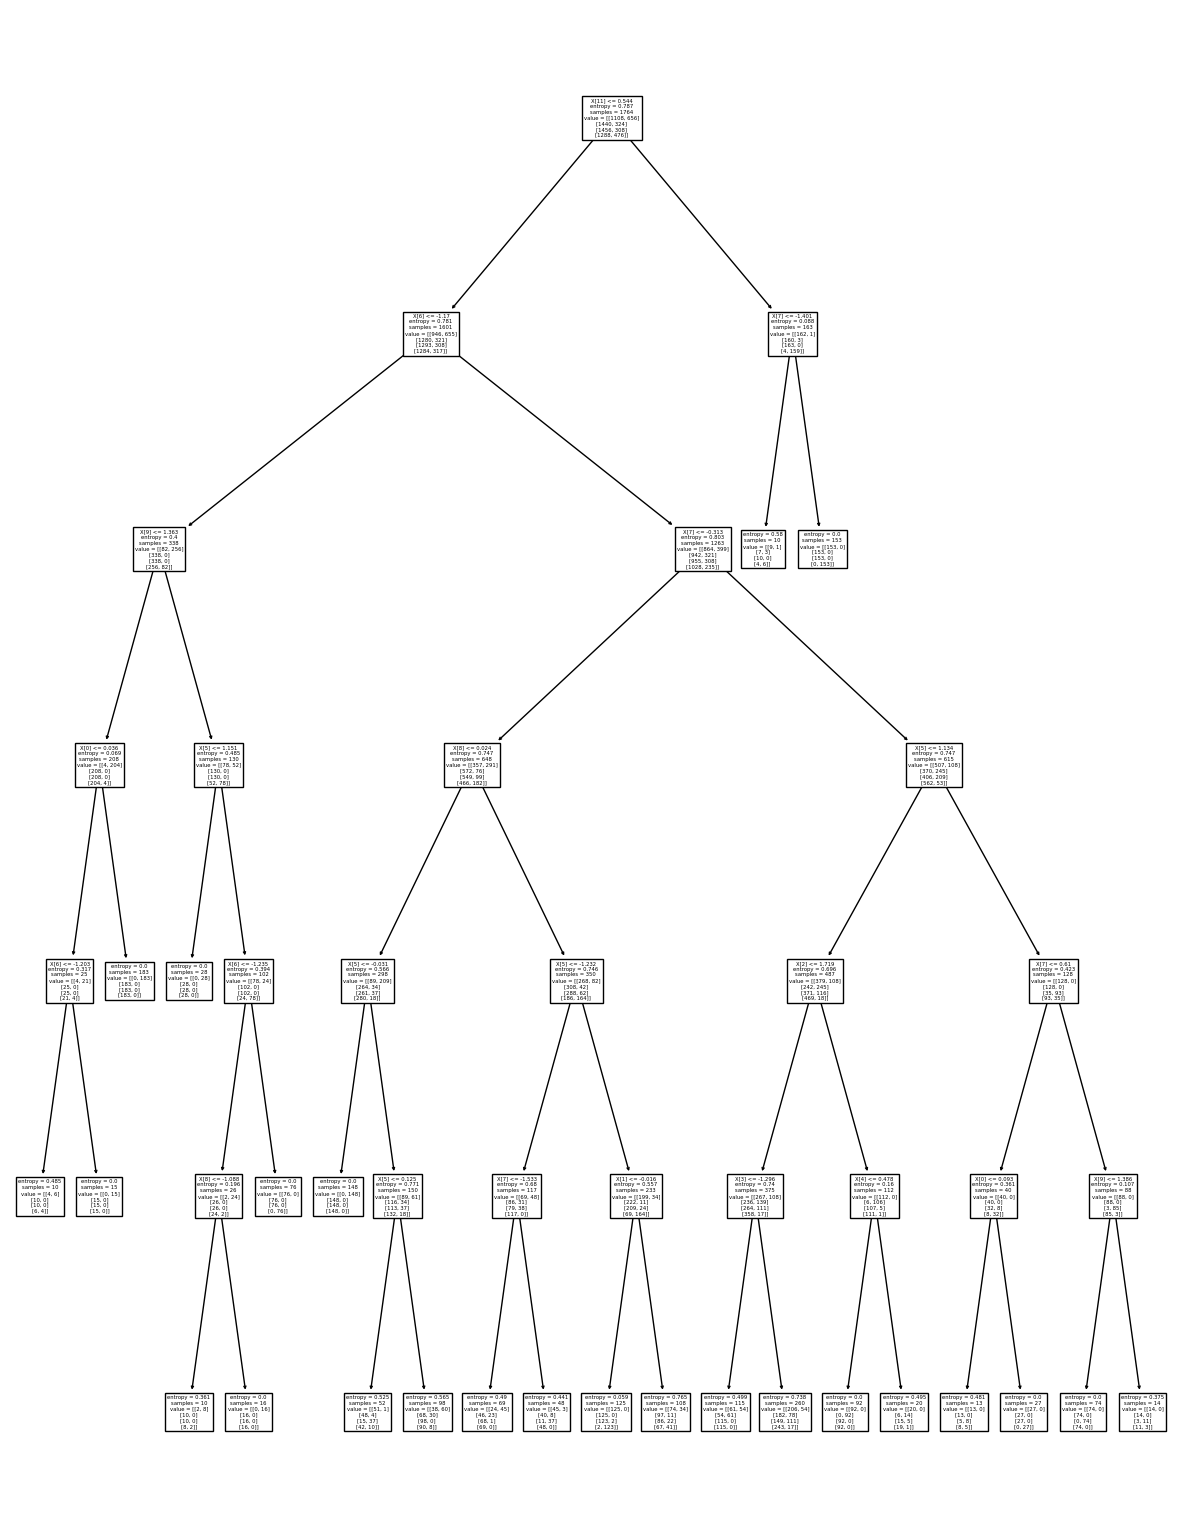

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,20), dpi=100)
#fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini)
#fig.savefig('tre.png')

In [ ]:
text_representation = tree.export_text(clf_gini, feature_names=X.columns.tolist())
print(text_representation)

|--- SE1 <= 0.54
|   |--- TS1 <= -1.17
|   |   |--- CE1 <= 1.36
|   |   |   |--- PS1 <= 0.04
|   |   |   |   |--- TS1 <= -1.20
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- TS1 >  -1.20
|   |   |   |   |   |--- class: 1
|   |   |   |--- PS1 >  0.04
|   |   |   |   |--- class: 1
|   |   |--- CE1 >  1.36
|   |   |   |--- FS2 <= 1.15
|   |   |   |   |--- class: 1
|   |   |   |--- FS2 >  1.15
|   |   |   |   |--- TS1 <= -1.23
|   |   |   |   |   |--- VS1 <= -1.09
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- VS1 >  -1.09
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- TS1 >  -1.23
|   |   |   |   |   |--- class: 0
|   |--- TS1 >  -1.17
|   |   |--- P1 <= -0.31
|   |   |   |--- VS1 <= 0.02
|   |   |   |   |--- FS2 <= -0.03
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- FS2 >  -0.03
|   |   |   |   |   |--- FS2 <= 0.12
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- FS2 >  0.12
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- 

In [ ]:
# get importance
importance = clf_gini.feature_importances_
# summarize feature importance
for feature_names,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (feature_names,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, tick_label= X.columns)
pyplot.show())

SyntaxError: ignored

In [ ]:
df.describe()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1,accumulator
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,1.753227,2.600266,9.163320,6.198549,9.649453,45.424567,2495.509203,0.613315,31.300695,1.808399,55.287900,107.199546
std,4.699425,0.251902,4.279355,0.576296,1.032883,0.449246,7.991933,73.836682,0.060260,11.574310,0.278263,8.960189,16.435848
min,155.391547,0.840252,0.000000,8.365800,2.018572,8.857513,35.313783,2361.747267,0.524367,17.555983,1.062150,18.276617,90.000000
25%,158.100195,1.729733,0.000000,8.547239,6.391670,9.203397,36.237150,2442.933467,0.555100,20.084650,1.550100,56.270183,90.000000
50%,158.960895,1.779631,0.000000,9.115781,6.576673,9.692270,44.836650,2480.926633,0.610183,27.392533,1.739683,58.758150,100.000000
75%,161.000735,1.932047,3.503266,9.844351,6.657508,10.155008,54.104317,2548.211467,0.649850,46.677383,2.148483,59.656900,130.000000
max,180.922708,2.023398,10.207068,9.978510,6.722707,10.403098,57.899283,2740.641000,0.839067,47.903667,2.840100,60.755300,130.000000


In [ ]:
df.sample(10)